In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [62]:
df_post = pd.read_csv('data3/posts_w_labels.csv')
df_post

,author,created_utc,id,link_flair_text,num_comments,permalink,score,selftext,title,name,author_fullname,word_count,created_datetime,year,Label,sentences
0,Ok-Slide-9849,1701251429,186lthy,NaN,2,/r/QAnonCasualties/comments/186lthy/a_belated_...,4,\tI've known about this group for a while and ...,"A belated post, does the it ever end?",t3_186lthy,t2_o416vnkb,924,1701251429000,2023,['Social Deterioration and Relationship Strain'],"[""\tI've known about this group for a while an..."
1,wanderingjeannie,1660010267,wjquol,NaN,3,/r/QAnonCasualties/comments/wjquol/q_anti_vax_...,13,\n\n\nDivorce is difficult situation generally...,Q anti Vax mom using the kids to hurt the Ex h...,t3_wjquol,t2_q75aaxj9,535,1660010267000,2022,"['Child Harm and Elite Abuse Narratives', 'Soc...","[""\n\n\nDivorce is difficult situation general..."
2,Mamailla,1611614013,l4zfzt,NaN,9,/r/QAnonCasualties/comments/l4zfzt/qanon_frien...,74,\n\n\nFive years ago when Trump began his camp...,Qanon friends sound like stories from Jonestown,t3_l4zfzt,t2_2yo216d6,236,1611614013000,2021,['Social Deterioration and Relationship Strain'],['\n\n\nFive years ago when Trump began his ca...
3,getsomeyayas,1630144463,pd70my,NaN,5,/r/QAnonCasualties/comments/pd70my/i_think_im_...,17,"\n\n\nhi, just using my throwaway to rant a li...",i think i'm beginning to lose my uncle,t3_pd70my,t2_4gftpyni,521,1630144463000,2021,"['Asian and Immigrant Family Dynamics', 'Inter...","['\n\n\nhi, just using my throwaway to rant a ..."
4,f_print,1597152737,i7rvmd,NaN,11,/r/QAnonCasualties/comments/i7rvmd/looking_for...,9,\n\n*Tl;dr What is the best source for Q-Anon....,Looking for best source of QAnon material to h...,t3_i7rvmd,t2_b7t0diw,383,1597152737000,2020,"['Child Harm and Elite Abuse Narratives', 'COV...",['\n\n*Tl;dr\xa0What is the best source for Q-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12742,SherlocktheWarlock,1703013286,18m9vcd,NaN,24,/r/QAnonCasualties/comments/18m9vcd/came_back_...,165,"“Well, they have to do that in order to red pi...","Came back for a shelf, left with more",t3_18m9vcd,t2_8vut8l97,615,1703013286000,2023,"['War-Inducing Rhetoric', 'Alternative Media U...","['“Well, they have to do that in order to red ..."
12743,Hot-Owl-2243,1732551047,1gzmfhy,NaN,30,/r/QAnonCasualties/comments/1gzmfhy/not_sure_i...,88,…but both my adult children are complete consp...,Not sure if it is QAnon…,t3_1gzmfhy,t2_5malttq2,179,1732551047000,2024,[],['…but both my adult children are complete con...
12744,Desperate-Thing1784,1693987388,16be8b5,NaN,2,/r/QAnonCasualties/comments/16be8b5/crazy_thin...,1,"■■■■■■■■■■SHE VOTES■■■■■■■■■■■\n\n●""HE didn't ...",CRAZY THINGS MY MOM SAYS HAVE A LAUGH AND ANEU...,t3_16be8b5,t2_c3pdtjjk,261,1693987388000,2023,[],"['■■■■■■■■■■SHE VOTES■■■■■■■■■■■\n\n●""HE didn\..."
12745,DeekALeek,1676416318,112j2pc,NaN,21,/r/QAnonCasualties/comments/112j2pc/i_helped_a...,102,"⚠️ TRIGGER WARNING: Domestic abuse, child abus...",I Helped a Friend Move Out of her Q-Fiancé’s H...,t3_112j2pc,t2_6emlogf8,824,1676416318000,2023,['Radical Ideological Alignment and Intoleranc...,"['⚠️ TRIGGER WARNING: Domestic abuse, child ab..."


In [63]:
import ast
df_post['Label'] = df_post['Label'].apply(ast.literal_eval)

In [64]:
post2labels = df_post['Label'].to_dict()

In [65]:
post2labels

{0: ['Social Deterioration and Relationship Strain'],
 1: ['Child Harm and Elite Abuse Narratives',
  'Social Deterioration and Relationship Strain'],
 2: ['Social Deterioration and Relationship Strain'],
 3: ['Asian and Immigrant Family Dynamics',
  'Interpersonal Harm and Moral Disregard',
  'Unknown'],
 4: ['Child Harm and Elite Abuse Narratives',
  'COVID-19 Lockdowns',
  'YouTube Algorithms',
  'Radical Ideological Alignment and Intolerance'],
 5: [],
 6: ['Social Deterioration and Relationship Strain',
  'Public Health Mistrust and Resistance'],
 7: ['Defamatory Conspiracy Targeting Public Figures',
  'Pro-Trump',
  'Epistemic Rigidity and Distrust in Expertise',
  'Conservative Political Identity',
  'Social Deterioration and Relationship Strain',
  'Alternative Media Use and Information Exposure',
  'Unknown'],
 8: ['Pro-Trump',
  'Interpersonal Harm and Moral Disregard',
  'Physical Health Disorders',
  "Trump's Election"],
 9: ['Policy Defiance'],
 10: ['Child Harm and Elite 

In [66]:
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# Step 1: Preprocess
docs = [doc for doc in post2labels.values() if doc]  # remove empty ones
dictionary = corpora.Dictionary(docs)
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [67]:
# Step 2: Define a function to train LDA and get coherence
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    models_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = models.LdaModel(corpus=corpus,
                                id2word=dictionary,
                                num_topics=num_topics,
                                random_state=42,
                                update_every=1,
                                chunksize=100,
                                passes=10,
                                alpha='auto',
                                per_word_topics=True)
        models_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return models_list, coherence_values

In [68]:
# Step 3: Run for a range of topic numbers
start, limit, step = 2, 15, 1
model_list, coherence_values = compute_coherence_values(dictionary, corpus, docs, start, limit, step)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [02:13<00:00, 10.26s/it]


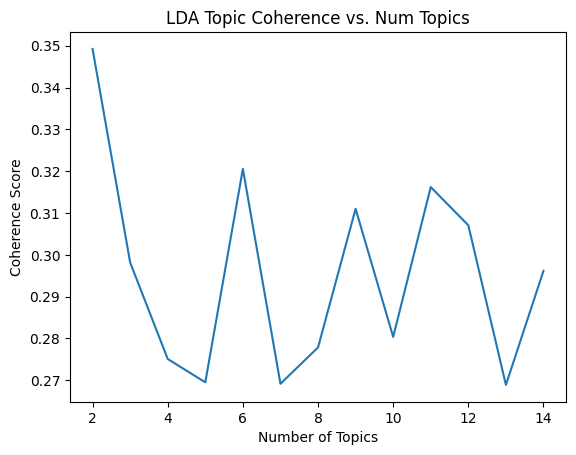


✅ Best model: 2 topics with coherence = 0.3492

Topic 0: 0.208*"Public Health Mistrust and Resistance" + 0.196*"Social Deterioration and Relationship Strain" + 0.117*"Unknown" + 0.077*"Child Harm and Elite Abuse Narratives" + 0.072*"Epistemic Rigidity and Distrust in Expertise" + 0.054*"Psychological and Emotional Shifts" + 0.048*"Apocalyptic and Eschatological Narratives" + 0.047*"COVID-19 Lockdowns" + 0.022*"Substance Use and Abuse" + 0.021*"Experiences of Race and Racism"
Topic 1: 0.120*"Interpersonal Harm and Moral Disregard" + 0.111*"Radical Ideological Alignment and Intolerance" + 0.086*"Pro-Trump" + 0.079*"Conservative Political Identity" + 0.061*"War-Inducing Rhetoric" + 0.060*"Lifestyle Changes Driven by Conspiratorial Beliefs" + 0.056*"Medical Mistrust" + 0.056*"Social Deterioration and Relationship Strain" + 0.050*"Religious Influence" + 0.045*"Fox News"


In [69]:
# Step 4: Plot the coherence scores
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("LDA Topic Coherence vs. Num Topics")
plt.show()

# Step 5: Print best model's topics
best_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[best_index]
optimal_num_topics = x[best_index]
print(f"\n✅ Best model: {optimal_num_topics} topics with coherence = {coherence_values[best_index]:.4f}\n")

for idx, topic in optimal_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

In [70]:
for idx, topic in model_list[3].print_topics(-1):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.305*"Lifestyle Changes Driven by Conspiratorial Beliefs" + 0.207*"Apocalyptic and Eschatological Narratives" + 0.102*"Policy Defiance" + 0.095*"Substance Use and Abuse" + 0.094*"Experiences of Race and Racism" + 0.064*"(Un)employment and Retirement Status" + 0.041*"Mental Health Disorders" + 0.040*"Perceived Personal Goodness" + 0.019*"Family with Children" + 0.016*"Holistic and Alternative Medicine Beliefs"
Topic 1: 0.285*"War-Inducing Rhetoric" + 0.264*"Medical Mistrust" + 0.211*"Fox News" + 0.079*"Anti-Government and Institutional Distrust" + 0.063*"Trump's Election" + 0.058*"Anti-Communism and Geopolitical Distrust" + 0.028*"Financial Struggles and Housing Instability" + 0.010*"Boomer Generation" + 0.000*"Parental Divorce Experiences" + 0.000*"Asian and Immigrant Family Dynamics"
Topic 2: 0.354*"Unknown" + 0.238*"Conservative Political Identity" + 0.126*"Physical Health Disorders" + 0.098*"Alternative Media Use and Information Exposure" + 0.041*"YouTube Algorithms" + 0.0

In [71]:
import re

In [72]:
def extract_words_from_topic(topic_string):
  """Extracts words from a topic string, ignoring numerical values."""
  words = re.findall(r'"(.*?)"', topic_string)
  return ', '.join(words)

In [73]:
print('k=4:')
for idx, topic in model_list[2].print_topics(-1):
    topic_words = extract_words_from_topic(topic)
    print(f'Topic: {idx} \nWords: {topic_words}')

print('k=5:')
for idx, topic in model_list[3].print_topics(-1):
    topic_words = extract_words_from_topic(topic)
    print(f'Topic: {idx} \nWords: {topic_words}')

print('='*20)
print('k=6:')
for idx, topic in model_list[4].print_topics(-1):
    topic_words = extract_words_from_topic(topic)
    print(f'Topic: {idx} \nWords: {topic_words}')

print('k=7:')
print('='*20)
for idx, topic in model_list[5].print_topics(-1):
    topic_words = extract_words_from_topic(topic)
    print(f'Topic: {idx} \nWords: {topic_words}')

k=4:
Topic: 0 
Words: Unknown, Epistemic Rigidity and Distrust in Expertise, Apocalyptic and Eschatological Narratives, Policy Defiance, Substance Use and Abuse, Experiences of Race and Racism, Defamatory Conspiracy Targeting Public Figures, (Un)employment and Retirement Status, Asian and Immigrant Family Dynamics, Perceived Personal Goodness
Topic: 1 
Words: Interpersonal Harm and Moral Disregard, Lifestyle Changes Driven by Conspiratorial Beliefs, War-Inducing Rhetoric, Medical Mistrust, Physical Health Disorders, Science and Technology Mistrust, Anti-Communism and Geopolitical Distrust, Financial Struggles and Housing Instability, Parental Divorce Experiences, Asian and Immigrant Family Dynamics
Topic: 2 
Words: Alternative Media Use and Information Exposure, YouTube Algorithms, Trump's Election, Tucker Carlson, Mental Health Disorders, Perceived High Intelligence, Non-American Perspectives, Parental Divorce Experiences, Social Media (in general), Older Individuals (40s-60s)
Topic: 

k=6:
* Topic 0 (not shown): Unknown trigger, diverse background and diverse outcome?? (mostly related to health e.g medical distrust & alt. medicine)
* Topic 1: COVID trigger -> Apocolyptic, anti-gov, anti-comm, etc
* Topic 2: From social media to alt. media & lifestyle change
* Topic 3: Religious influence towards a variety of backgrounds?
* Topic 4 (not shown): Non-American perspective? -> Science&Tech, policy defiance + psy/emo shift
* Topic 5: Conservative -> escalate or reinforced through consv media like fox news -> pro-trump, war-inducing, interpersonal harm etc

Let's see k=6:

In [74]:
doc_topic_dist = [model_list[4].get_document_topics(doc) for doc in corpus]

In [75]:
from collections import defaultdict

top_docs_per_topic = defaultdict(lambda: (None, 0.0))  # topic_id -> (doc_index, prob)

for doc_index, topics in enumerate(doc_topic_dist):
    for topic_id, prob in topics:
        # Update if this doc is more representative of the topic
        if prob > top_docs_per_topic[topic_id][1]:
            top_docs_per_topic[topic_id] = (doc_index, prob)

In [76]:
from typing import List

for topic_id, (doc_index, prob) in top_docs_per_topic.items():
    print(f"Topic #{topic_id} (score={prob:.2f}):")
    
    # Get the label list from the representative doc
    target_labels = set(docs[doc_index])
    print(f"- List of topic words: {target_labels}\n")

    print("- Representative document:")
    # Find all rows where target_labels is a subset of the 'Label' column
    mask = df_post['Label'].apply(lambda labels: target_labels.issubset(set(labels)))
    
    # Filter the DataFrame
    matching_rows = df_post[mask]['selftext'].values[0]

    print(matching_rows)
    print("-" * 50)

Topic #0 (score=0.26):
- List of topic words: {'Physical Health Disorders', 'Unknown', 'Public Health Mistrust and Resistance', 'Family with Children', 'Medical Mistrust', 'Holistic and Alternative Medicine Beliefs', 'Pro-Trump'}

- Representative document:
So mother in law = boyfriends mom, just easier to type MIL

Where to start? There's no mercury in fish apparently. My FIL tried to explain to her that there are low levels so you can't eat a lot but she says there's none at all.

Pelosi is one of the good guys now but only because she wants to stay in office and not get killed or something. And just like any Democrat of color in office VP Harris was not born in America.

She said hydrogen peroxide puts oxygen into your blood and cures cancer?? I am pretty sure I heard that one right but it is so strange I have no idea anymore. I wonder if she is going to start dumping it on my boyfriend who had cancer a few years back and no one really knows if it will come back or not. My FIL tried

In [77]:
print('k=6:')
topics6 = [re.findall(r'"(.*?)"', topic) for idx, topic in model_list[4].print_topics(-1)]
topics6

k=6:


[['Public Health Mistrust and Resistance',
  'Medical Mistrust',
  'Physical Health Disorders',
  'Holistic and Alternative Medicine Beliefs',
  'Asian and Immigrant Family Dynamics',
  'Parental Divorce Experiences',
  'Non-American Perspectives',
  '(Un)employment and Retirement Status',
  'War-Inducing Rhetoric',
  'Anti-Communism and Geopolitical Distrust'],
 ['COVID-19 Lockdowns',
  'Apocalyptic and Eschatological Narratives',
  'Anti-Government and Institutional Distrust',
  'Financial Struggles and Housing Instability',
  'Rush Limbaugh',
  'Parental Divorce Experiences',
  'Asian and Immigrant Family Dynamics',
  'Perceived Personal Goodness',
  'Anti-Communism and Geopolitical Distrust',
  'War-Inducing Rhetoric'],
 ['Lifestyle Changes Driven by Conspiratorial Beliefs',
  'Alternative Media Use and Information Exposure',
  'Facebook',
  'YouTube Algorithms',
  'Tucker Carlson',
  'Parental Divorce Experiences',
  'Academic Credentials and Graduation Milestones',
  'Social Medi

In [79]:
import pickle

with open('data4/topics6', 'wb') as fp:
    pickle.dump(topics6, fp)

In [81]:
model_list[4].save('data4/lda6')